<a href="https://colab.research.google.com/github/habibb97/CLI-APP/blob/main/pytorch_untuk_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengenalan Pytorch

PyTorch adalah library machine learning berbasis Python yang dikembangkan oleh Facebook AI Research. Library ini populer untuk membangun dan melatih model deep learning.



🔸 Keunggulan PyTorch:
Dynamic Computation Graph (define-by-run)
Mudah digunakan dan fleksibel—cocok untuk riset dan eksperimen.

Mudah digunakan seperti NumPy, tapi bisa jalan di GPU.

Mendukung autograd: otomatis menghitung turunan (gradien), penting untuk training neural network.

In [ ]:
import torch
import numpy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Menggunakan device:", device)

# Membuat tensor
x = torch.tensor([2.0], requires_grad=True)
xtest = torch.tensor([1.0, 1.2, 1.3])

# Operasi
y = x ** 2 + 3 * x + 1

ytest = xtest ** 2 + 3 * xtest + 1


# Backpropagation
y.backward()

print(x.grad)  # Output: turunan dy/dx = 2x + 3
print(xtest)

Menggunakan device: cpu
tensor([7.])
tensor([1.0000, 1.2000, 1.3000])


In [ ]:
import torch

# Input dari user
x = input("Masukkan angka: ")
x = torch.tensor([float(x)], requires_grad=True)

# Operasi matematika
y = x ** 2 + 3 * x + 1

# Hitung turunan (gradien)
y.backward()

# Tampilkan hasil
print(f"x = {x.item()}, dy/dx = {x.grad.item()}")


Masukkan angka: 2.0
x = 2.0, dy/dx = 7.0


## tipe data pada pytorch

- `torch.float32` atau `torch.float`: 32-bit floating-point
- `torch.float64` atau `torch.double`: 64-bit, double-precision floating-point
- `torch.float16` atau `torch.half`: 16-bit, half-precision floating-point
- `torch.int8`: signed 8-bit integers
- `torch.uint8`: unsigned 8-bit integers
- `torch.int16` atau `torch.short`: signed 16-bit integers
- `torch.int32` atau `torch.int`: signed 32-bit integers
- `torch.int64` atau `torch.long`: signed 64-bit integers
- `torch.bool`: Boolean


In [ ]:
tensor_ones = torch.ones(3, 2)
tensor_zeros = torch.zeros(5)
tensor_array = torch.tensor([
    [4.0, 1.0],
    [5.0, 3.0],
    [2.0, 1.0]
    ])

# custom_array = [[x1, x1],[x2,x2],[x3,x3]]
# custom_tensor = torch.tensor(custom_array)

tensor_ones.shape , tensor_ones #, custom_tensor


(torch.Size([3, 2]),
 tensor([[1., 1.],
         [1., 1.],
         [1., 1.]]))

In [ ]:
tensor_ones = torch.zeros(4, 3)
tensor_ones



tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
tensor_ones.detach().cpu().numpy() #mengambil nilai tensor kedalam cpu dan dimasukan dalam format numpy
tensor_ones

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [ ]:
tensor_test = torch.tensor([2.3, 2.4], dtype=torch.float32)
tensor_test1 = torch.tensor([2.3, 2.4], dtype=torch.float16)


tensor_sum = tensor_test + tensor_test1
tensor_sum.dtype





torch.float32

In [ ]:


tensor_array_f64 = torch.tensor([
    [4.0, 1.0],
    [5.0, 3.0],
    [2.0, 1.0]
    ],dtype=torch.float64) #membuat


tensor_array_f64.to(torch.short)
tensor_array_f64.dtype


torch.float64

In [ ]:
tensor_array = torch.tensor([
    [4.4, 1.4],
    [5.4, 3.4],
    [2.4, 1.4]
    ])

tensor_arr_64 = tensor_array.to(torch.double) # float64
tensor_arr_16 = tensor_array.to(torch.half) #float16
tensor_sum = tensor_arr_64 + tensor_arr_16


tensor_arr_64.dtype, tensor_arr_16.dtype, tensor_sum.dtype, tensor_sum


(torch.float64,
 torch.float16,
 torch.float64,
 tensor([[ 8.7984,  2.8004],
         [10.7984,  6.8004],
         [ 4.8004,  2.8004]], dtype=torch.float64))

## mekanisme learning

#Data Image dan Data Tabular

##Data Image

Size: (800, 600)
Mode: RGBA


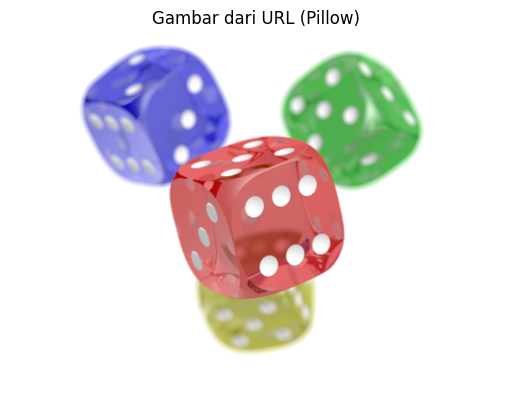

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np


# URL gambar
url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"

# Unduh gambar dari URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Tampilkan ukuran
print("Size:", img.size)      # (width, height)
print("Mode:", img.mode)      # 'RGBA' jika ada alpha channel

# Tampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.title("Gambar dari URL (Pillow)")
plt.show()


In [ ]:
r, g, b, a = img.split()

# Size dari rgb sendiri adalah 2 dimensi H,W
r_array = np.array(r)
g_array = np.array(g)
b_array = np.array(b)
a_array = np.array(a)


# untuk mendapattkan 3 dimensi perlu stack axis = -1 mempertahankan dimensi
rgb_array = np.stack((r_array, g_array, b_array, a_array), axis=-1)


print(r_array.shape)
print(g_array.shape)
print(b_array.shape)

(600, 800)
(600, 800)
(600, 800)


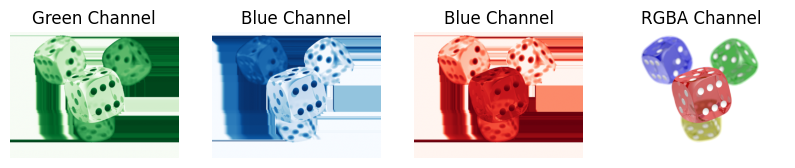

In [ ]:
# Membuat plot dengan subplot
fig, axs = plt.subplots(1, 4, figsize=(10, 5))

# Plot komponen hijau (G)
axs[0].imshow(g_array, cmap='Greens')
axs[0].set_title('Green Channel')
axs[0].axis('off')  # Menyembunyikan sumbu

# Plot komponen biru (B)
axs[1].imshow(b_array, cmap='Blues')
axs[1].set_title('Blue Channel')
axs[1].axis('off')  # Menyembunyikan sumbu


# Plot komponen merah (r)
axs[2].imshow(r_array, cmap='Reds')
axs[2].set_title('Blue Channel')
axs[2].axis('off')  # Menyembunyikan sumbu



# Plot komponen rgbs
axs[3].imshow(rgb_array)
axs[3].set_title('RGBA Channel')
axs[3].axis('off')


plt.show()

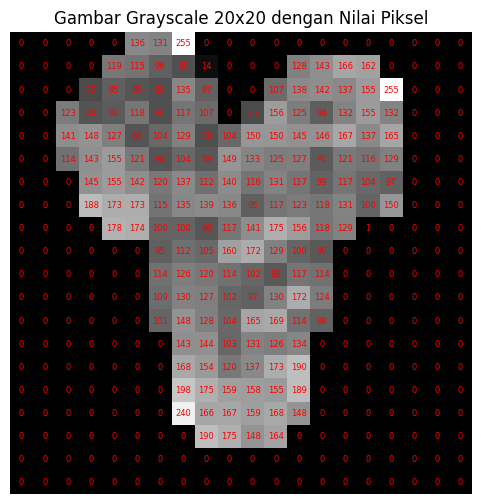

In [ ]:
img = Image.open(BytesIO(response.content))

# 2. Resize gambar ke ukuran kecil (misal 20x20)
img = img.resize((20, 20))

# 3. Ubah ke grayscale
img_gray = img.convert('L')

# 4. Konversi ke array numpy
img_np = np.array(img_gray)

# 5. Tampilkan gambar dan nilai piksel
plt.figure(figsize=(6, 6))
plt.imshow(img_np, cmap='gray')
plt.axis('off')
plt.title("Gambar Grayscale 20x20 dengan Nilai Piksel")

# Tambahkan nilai piksel di setiap kotak
h, w = img_np.shape
for y in range(h):
    for x in range(w):
        plt.text(x, y, str(img_np[y, x]), color='red', fontsize=6, ha='center', va='center')

plt.show()

tensor_img = torch.tensor(img_np, dtype=torch.half)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from PIL import Image
import torch
from ipywidgets import interact

# 1. Ambil MNIST dataset (train set)
transform = transforms.Compose([
    transforms.ToTensor()
])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 2. Ambil sequence gambar dari class tertentu (misal angka "3")
sequence = [img for img, label in mnist if label == 3][:5]  # Ambil 5 gambar angka 3

# 3. Resize dan ubah ke array grayscale
resized_images = []
for img_tensor in sequence:
    img_pil = transforms.ToPILImage()(img_tensor)
    img_small = img_pil.resize((10, 10))  # resize ke 10x10
    img_gray = img_small.convert('L')
    resized_images.append(np.array(img_gray))

# 4. Fungsi untuk menampilkan gambar + nilai piksel
def plot_sequence_frame(idx):
    img = resized_images[idx]
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(f"Gambar Digit ke-{idx} (dari 5)")
    plt.axis('off')

    h, w = img.shape
    for y in range(h):
        for x in range(w):
            plt.text(x, y, str(img[y, x]), ha='center', va='center', color='red', fontsize=6)

    plt.show()

# 5. Gunakan widget untuk memilih frame
interact(plot_sequence_frame, idx=(0, len(resized_images)-1));


100%|██████████| 9.91M/9.91M [00:00<00:00, 36.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.07MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.65MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.20MB/s]


interactive(children=(IntSlider(value=2, description='idx', max=4), Output()), _dom_classes=('widget-interact'…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from PIL import Image
from tensorflow.keras.datasets import mnist

# Simulasi Moving MNIST sederhana: gerakkan satu digit ke kanan
def create_moving_mnist_sequence(digit_image, num_frames=10, shift_per_frame=2):
    sequence = []
    for i in range(num_frames):
        shifted = np.roll(digit_image, shift=i*shift_per_frame, axis=1)
        sequence.append(shifted)
    return np.array(sequence)

# Ambil satu sample digit dari MNIST
(x_train, y_train), _ = mnist.load_data()
digit_image = x_train[np.where(y_train == 5)[0][0]]  # ambil contoh digit 5

# Resize jadi kecil biar nilai pixelnya jelas
digit_image_small = np.array(Image.fromarray(digit_image).resize((20, 20), Image.Resampling.LANCZOS))

# Buat sequence bergerak
sequence = create_moving_mnist_sequence(digit_image_small)

# Fungsi untuk menampilkan frame + nilai pixelnya
def show_frame(frame_idx):
    img = sequence[frame_idx]

    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

    # Tampilkan nilai pixel
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            plt.text(j, i, str(img[i, j]), color='red', ha='center', va='center', fontsize=6)

    plt.title(f'Frame {frame_idx}')
    plt.axis('off')
    plt.show()

# Buat slider
interact(show_frame, frame_idx=IntSlider(min=0, max=sequence.shape[0]-1, step=1, value=0));


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


interactive(children=(IntSlider(value=0, description='frame_idx', max=9), Output()), _dom_classes=('widget-int…

## Data Tabular

In [ ]:
!pip install -q gdown
import gdown
import pandas as pd

# File ID dari Google Drive
file_id = "1JRlviQw-HMxqzqbPUiAg4e0OerFFgJ4f"
# Nama file lokal
output = "data.pkl"

# Unduh file dari Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

# Baca file pickle pakai pandas
df = pd.read_pickle(output)

# Tampilkan isi
print(df.head())
print(df.dtypes)



Downloading...
From: https://drive.google.com/uc?id=1JRlviQw-HMxqzqbPUiAg4e0OerFFgJ4f
To: /content/data.pkl
100%|██████████| 1.88M/1.88M [00:00<00:00, 113MB/s]

               date temperature dewpoint humidity pressure 0 pressure sea  \
0  12/31/2012 21:00        25.0     23.6       92     1008.0       1008.5   
1  12/31/2012 21:00        25.0     23.6       92     1008.0       1008.5   
2  12/31/2012 18:00        25.2     23.7       91     1008.2       1008.7   
3  12/31/2012 15:00        25.8     24.6       93     1009.7       1010.2   
4  12/31/2012 12:00        27.6     24.4       83     1007.2       1007.7   

    hujan  
0  0.0/3h  
1  0.0/3h  
2  9.0/6h  
3  7.0/3h  
4  2.0/6h  
date            object
temperature     object
dewpoint        object
humidity        object
pressure 0      object
pressure sea    object
hujan           object
dtype: object


In [ ]:
df.head(24)

,date,temperature,dewpoint,humidity,pressure 0,pressure sea,hujan
0,12/31/2012 21:00,25.0,23.6,92,1008.0,1008.5,0.0/3h
1,12/31/2012 21:00,25.0,23.6,92,1008.0,1008.5,0.0/3h
2,12/31/2012 18:00,25.2,23.7,91,1008.2,1008.7,9.0/6h
3,12/31/2012 15:00,25.8,24.6,93,1009.7,1010.2,7.0/3h
4,12/31/2012 12:00,27.6,24.4,83,1007.2,1007.7,2.0/6h
5,12/31/2012 06:00,31.1,23.6,64,1007.2,1007.7,0.0/6h
6,12/31/2012 03:00,29.3,23.3,70,1008.7,1009.2,0.0/3h
7,12/31/2012 00:00,26.8,23.2,81,1008.1,1008.5,1.0/24h
8,12/30/2012 21:00,26.0,23.0,84,1006.1,1006.5,0.0/3h
9,12/30/2012 18:00,26.4,23.1,82,1007.8,1008.2,0.0/6h


In [ ]:
import re

rain_col = df.columns[-1]

def parse_precip(value):
    """
    Ambil angka pertama dari string, lalu sesuaikan dengan interval waktu.
    Jika 'Tr' atau tidak ada angka, hasilkan 0.0
    """
    if isinstance(value, str):
        # Cari angka pertama di awal string
        match = re.search(r'(\d+(\.\d+)?)', value)
        if match:
            val = float(match.group(1))
        else:
            val = 0.0

        # Sesuaikan berdasarkan periode waktu
        if '/6h' in value:
            val = val / 2
        elif '/24h' in value:
            val = val / 8
        # Jika /3h atau tidak ada, biarkan
        return val
    return 0.0



# Terapkan fungsi ke kolom hujan
df['rain_3h'] = df[rain_col].apply(parse_precip)

# Tampilkan hasil
print(df[[rain_col, 'rain_3h']].head(24))

            hujan  rain_3h
0          0.0/3h    0.000
1          0.0/3h    0.000
2          9.0/6h    4.500
3          7.0/3h    7.000
4          2.0/6h    1.000
5          0.0/6h    0.000
6          0.0/3h    0.000
7         1.0/24h    0.125
8          0.0/3h    0.000
9          0.0/6h    0.000
10         0.0/3h    0.000
11         1.0/6h    0.500
12         1.0/3h    1.000
13         0.0/6h    0.000
14         0.0/3h    0.000
15        3.0/24h    0.375
16         0.0/3h    0.000
17         0.0/6h    0.000
18         0.0/3h    0.000
19         3.0/6h    1.500
20          Tr/3h    3.000
21         0.0/6h    0.000
22         0.0/3h    0.000
23  18.0/24hTr/3h    2.250


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28841 entries, 0 to 28840
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temperature   28797 non-null  float64
 1   dewpoint      28822 non-null  float64
 2   humidity      28760 non-null  float64
 3   pressure 0    28831 non-null  float64
 4   pressure sea  28829 non-null  float64
 5   rain_3h       28841 non-null  float64
dtypes: float64(6)
memory usage: 1.3 MB


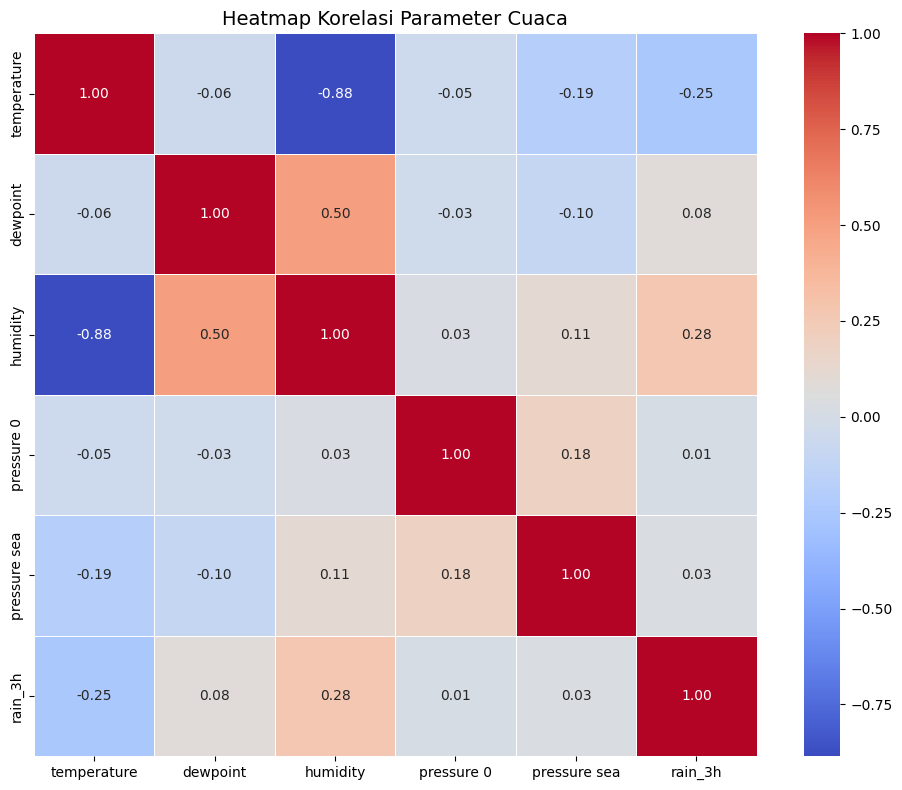

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buang kolom 'date' dan 'hujan'
df_corr = df.drop(columns=['date', 'hujan'])
df_corr = df_corr.apply(pd.to_numeric, errors='coerce')
df_corr.info()

# Hitung matriks korelasi
corr_matrix = df_corr.corr(numeric_only=True)

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)

plt.title("Heatmap Korelasi Parameter Cuaca", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler

# 1. Hapus baris yang mengandung NaN
df_clean = df_corr.dropna()

# 2. Pisahkan fitur dan target
X = df_clean.drop(columns=['rain_3h'])
y = df_clean['rain_3h']

# 3. Normalisasi fitur dengan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Konversi ke tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)  # shape (N, 1)

# 5. Buat dataset dan dataloader
dataset = TensorDataset(X_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=6, shuffle=True)

# 6. Contoh akses satu batch
for xb, yb in data_loader:
    print("Fitur (normalized):", xb.shape)
    print("Target (rain_3h):", yb.shape)
    break




Fitur (normalized): torch.Size([6, 5])
Target (rain_3h): torch.Size([6, 1])


#Simulasi RNN-LSTM

## Inisiasi Config dan Import library

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hyperparameter dictionary untuk tuning
configs = {
    "input_size": 5,
    "hidden_size": 64,
    "num_layers": 3,
    "lr": 0.001,
    "batch_size": 1,
    "epochs": 70,
    "sequence_length": 1,
    "train_split": 0.8,
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "n_dataset": 100
}






## DataLoader

In [ ]:
!pip install -q gdown
import gdown
import pandas as pd
import re

def parse_precip(value):
    """
    Ambil angka pertama dari string, lalu sesuaikan dengan interval waktu.
    Jika 'Tr' atau tidak ada angka, hasilkan 0.0
    """
    if isinstance(value, str):
        # Cari angka pertama di awal string
        match = re.search(r'(\d+(\.\d+)?)', value)
        if match:
            val = float(match.group(1))
        else:
            val = 0.0

        # Sesuaikan berdasarkan periode waktu
        if '/6h' in value:
            val = val / 2
        elif '/24h' in value:
            val = val / 8
        # Jika /3h atau tidak ada, biarkan
        return val
    return 0.0


# File ID dari Google Drive
file_id = "1JRlviQw-HMxqzqbPUiAg4e0OerFFgJ4f"
# Nama file lokal
output = "data.pkl"

# Unduh file dari Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

# Baca file pickle pakai pandas
df = pd.read_pickle(output)
# Slice sampai baris ke-n sesuai configs.n_dataset
df = df.iloc[:configs['n_dataset']]


rain_col = df.columns[-1]

# Terapkan fungsi ke kolom hujan
df['rain_3h'] = df[rain_col].apply(parse_precip)
df = df.drop(columns=['date','hujan'])
df = df.apply(pd.to_numeric, errors='coerce')




Downloading...
From: https://drive.google.com/uc?id=1JRlviQw-HMxqzqbPUiAg4e0OerFFgJ4f
To: /content/data.pkl
100%|██████████| 1.88M/1.88M [00:00<00:00, 130MB/s]


In [ ]:
# 1. Hapus NaN
df = df.dropna()

features = df.drop(columns=["rain_3h"])
target = df["rain_3h"]

# Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Dataset class
class RainDataset(Dataset):
    def __init__(self, X, y, seq_len=1):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)
        self.seq_len = seq_len

    def __len__(self):
        return len(self.X) - self.seq_len + 1

    def __getitem__(self, idx):
        return self.X[idx:idx+self.seq_len], self.y[idx+self.seq_len-1]

# Dataset
dataset = RainDataset(features_scaled, target, seq_len=configs["sequence_length"])

# Split
train_size = int(configs["train_split"] * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=configs["batch_size"], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=configs["batch_size"], shuffle=False)

In [ ]:
train_size, val_size

(80, 20)

## RNN LSTM Model

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # ambil hidden terakhir
        out = self.fc(out)
        return out

model = LSTMModel(configs["input_size"], configs["hidden_size"], configs["num_layers"]).to(configs["device"])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=configs["lr"])


##Training dan Validasi

In [ ]:

train_losses = []
val_losses = []
last_preds = []
last_actuals = []

for epoch in range(configs["epochs"]):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(configs["device"]), y_batch.to(configs["device"])
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0
    preds = []
    actuals = []
    with torch.no_grad():
        for X_val, y_val in val_loader:
            X_val, y_val = X_val.to(configs["device"]), y_val.to(configs["device"])
            output = model(X_val)
            loss = criterion(output, y_val)
            val_loss += loss.item()
            preds.extend(output.cpu().numpy())
            actuals.extend(y_val.cpu().numpy())

    val_losses.append(val_loss / len(val_loader))
    print(f"Epoch {epoch+1}/{configs['epochs']} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f}")

    if epoch == configs["epochs"] - 1:
        last_preds = preds
        last_actuals = actuals




Epoch 1/70 - Train Loss: 109.8824 - Val Loss: 68.9177
Epoch 2/70 - Train Loss: 106.4847 - Val Loss: 63.2552
Epoch 3/70 - Train Loss: 95.4677 - Val Loss: 52.6977
Epoch 4/70 - Train Loss: 89.5555 - Val Loss: 50.2402
Epoch 5/70 - Train Loss: 86.1340 - Val Loss: 48.1008
Epoch 6/70 - Train Loss: 81.7108 - Val Loss: 47.0506
Epoch 7/70 - Train Loss: 79.0494 - Val Loss: 45.7752
Epoch 8/70 - Train Loss: 76.7621 - Val Loss: 45.3135
Epoch 9/70 - Train Loss: 74.4181 - Val Loss: 44.1852
Epoch 10/70 - Train Loss: 73.3467 - Val Loss: 44.4470
Epoch 11/70 - Train Loss: 70.6642 - Val Loss: 45.0777
Epoch 12/70 - Train Loss: 69.4276 - Val Loss: 45.0831
Epoch 13/70 - Train Loss: 67.8285 - Val Loss: 42.4393
Epoch 14/70 - Train Loss: 66.3058 - Val Loss: 43.1784
Epoch 15/70 - Train Loss: 65.0414 - Val Loss: 41.8434
Epoch 16/70 - Train Loss: 64.0914 - Val Loss: 41.2480
Epoch 17/70 - Train Loss: 62.5681 - Val Loss: 39.3687
Epoch 18/70 - Train Loss: 61.3558 - Val Loss: 40.4185
Epoch 19/70 - Train Loss: 60.1559 -

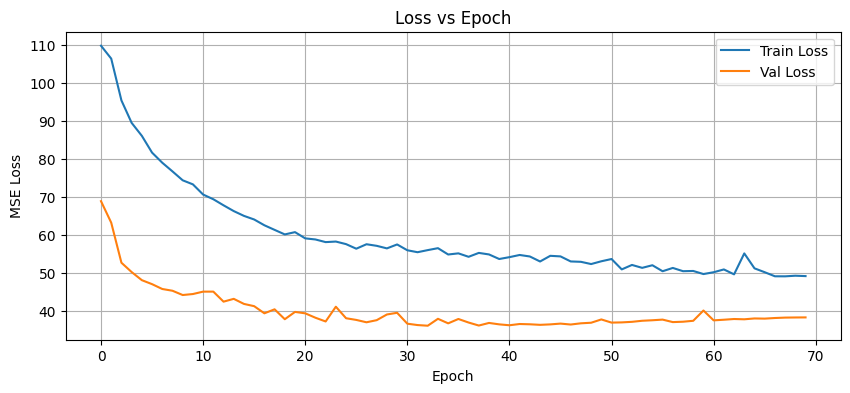

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid()
plt.show()

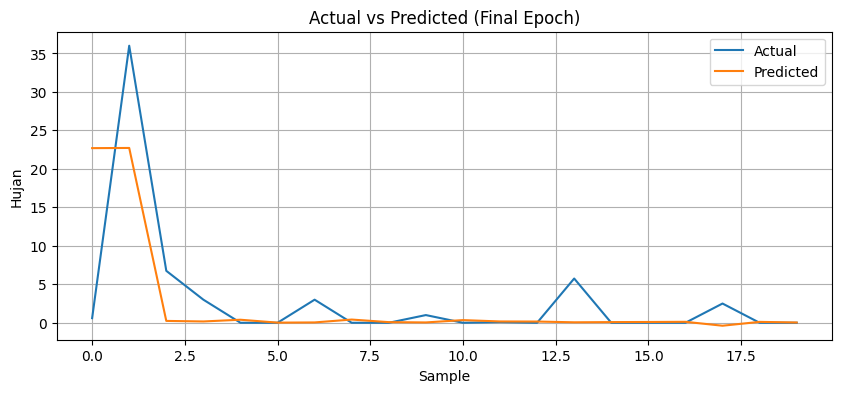

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(last_actuals, label='Actual')
plt.plot(last_preds, label='Predicted')
plt.title('Actual vs Predicted (Final Epoch)')
plt.xlabel('Sample')
plt.ylabel('Hujan')
plt.legend()
plt.grid()
plt.show()